# G2M investigation on 2 cab company

### Business Understanding

>You should fully investigate and understand each data set.

    - Review the Source Documentation
    - Understand the field names and data types
    - Identify relationships across the files
    - Field/feature transformations
    - Determine which files should be joined versus which ones should be appended
    - Create master data and explain the relationship
    - Identify and remove duplicates
    - Perform other analysis like NA value and outlier detection


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# define a custom color palette
custom_palette = ['#FFC0CB', '#FFFF00']

# set the color palette using seaborn
sns.set_palette(custom_palette)


### Dataset infomation

#### Datastet Source : https://github.com/DataGlacier/DataSets
        
> Cab_Data.csv – this file includes details of transaction for 2 cab companies

    fields:
    - Transaction ID  : Id of the transaction 
    - Date of Travel  : date of the trip
    - Company  : Company that own the cab       
    - City : city where  the cab offer is service       
    - KM Travelled : distance travelled in kilometer  
    - Price Charged : amount charged from the customer
    - Cost of Trip : normal price that the customer should pay   

> Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

    fields:
    - Customer ID' : : Id of the Customer 
    - 'Gender' : gender of the customer Male of femel
    - 'Age' :  18 - 65 years old
    - 'Income (USD/Month) : 2000 - 35000 usd /month


> Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

    fields:
    - 'Transaction ID' : Id of the transaction 
    - 'Customer ID' : Id of the Customer 
    - 'Payment_Mode : 'Card' or 'Cash'

> City.csv – this file contains list of US cities, their population and number of cab users

    fields:
    - 'City' : name of 20 different city of USA (['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA']
       
    - 'Population' : number of people living by city
    
    - 'Users' : number of user using the cab by city

## Data collection and preparation

### loading dataset

In [4]:
cab=pd.read_csv('DataSets-main/Cab_Data.csv')

In [5]:
cab.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,01/08/16,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,01/06/16,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,01/02/16,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,01/07/16,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,01/03/16,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


> there is not null value

In [7]:
cab.duplicated().sum()

0

In [8]:
city=pd.read_csv('DataSets-main/City.csv')

In [9]:
city.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


> there is not null value

In [11]:
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [12]:
city.duplicated().sum()

0

In [13]:
city.City.unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

In [14]:
city.City.nunique()

20

In [15]:
customer=pd.read_csv('DataSets-main/Customer_ID.csv')

In [16]:
customer.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [17]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


> there is not null value

In [18]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [19]:
customer.duplicated().sum()

0

In [20]:
Transaction=pd.read_csv('DataSets-main/Transaction_ID.csv')

In [21]:
Transaction.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [22]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


> there is not null value

In [23]:
Transaction.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [24]:
Transaction.Payment_Mode.unique()

array(['Card', 'Cash'], dtype=object)

In [25]:
Transaction.duplicated().sum()

0

cab 
- Date of Travel have to be in datetime format 

city
- delete the ',' and convert from population and user  and convert then into integer format

- TransactionID an cab_data coulb be join

### Data Cleaning

In [26]:
cab.columns = [col.replace(' ', '_') for col in cab.columns]

In [27]:
cab.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

<span style="font-size: 14pt; font-weight: bold; color:red">1-Date of Travel have to be in datetime format </span>

In [28]:
cab['Date_of_Travel']=pd.to_datetime(cab['Date_of_Travel'])

In [29]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction_ID  359392 non-null  int64         
 1   Date_of_Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM_Travelled    359392 non-null  float64       
 5   Price_Charged   359392 non-null  float64       
 6   Cost_of_Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


<span style="font-size: 14pt; font-weight: bold; color:red"> 2- delete the ',' and convert from population and user  and convert then into integer format</span>

In [30]:
# define function to remove commas and convert to int
def clean_and_convert(value):
    return int(value.replace(',', '').strip())

In [31]:
city_col_to_int=['Population', 'Users']

In [32]:
city_clean=city.copy()
city_clean[['Population', 'Users']]=city_clean[['Population', 'Users']].applymap(clean_and_convert)

In [33]:
city_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


<span style="font-size:14pt; font-weight:bold; color:red">TransactionID an cab_data coulD be joined <span>

In [34]:
Transaction.columns = [col.replace(' ', '_') for col in Transaction.columns]
city.columns = [col.replace(' ', '_') for col in city.columns]
customer.columns = [col.replace(' ', '_') for col in customer.columns]


In [35]:
transaction = pd.merge(cab, Transaction, on='Transaction_ID')

In [36]:
dt=pd.merge(transaction,customer ,on='Customer_ID')

In [37]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date_of_Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM_Travelled        359392 non-null  float64       
 5   Price_Charged       359392 non-null  float64       
 6   Cost_of_Trip        359392 non-null  float64       
 7   Customer_ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income_(USD/Month)  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


In [38]:
dt.duplicated().sum()

0

<Axes: >

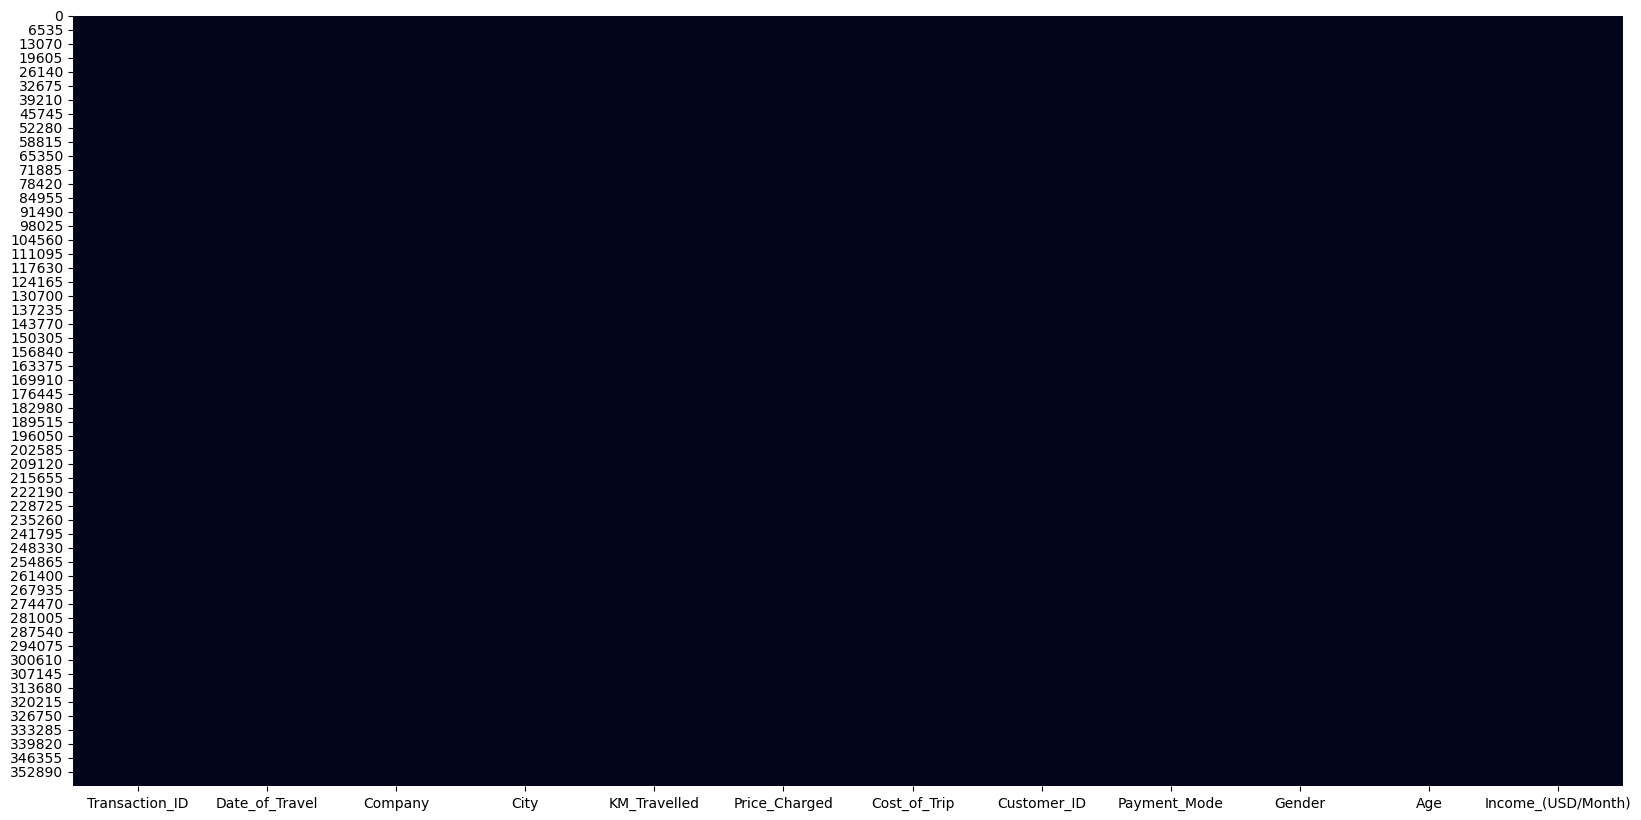

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(dt.isna(), cbar=False)

#### Outliers detection

## Data Analysing and visualisation

### Univariate analysis

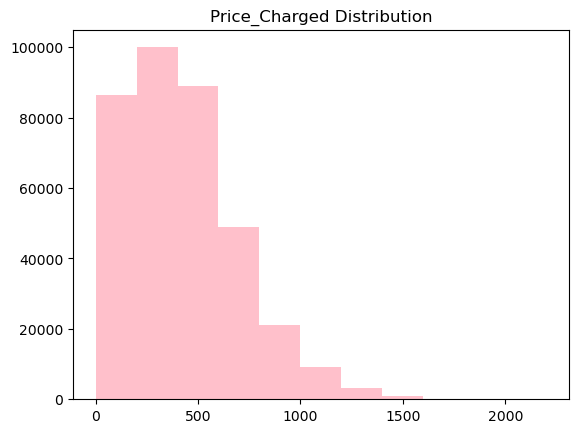

In [40]:
binsize = 200
bins = np.arange(0,cab.Price_Charged.max()+binsize, binsize)
plt.hist(cab.Price_Charged,bins=bins)
plt.title('Price_Charged Distribution')
plt.show() 

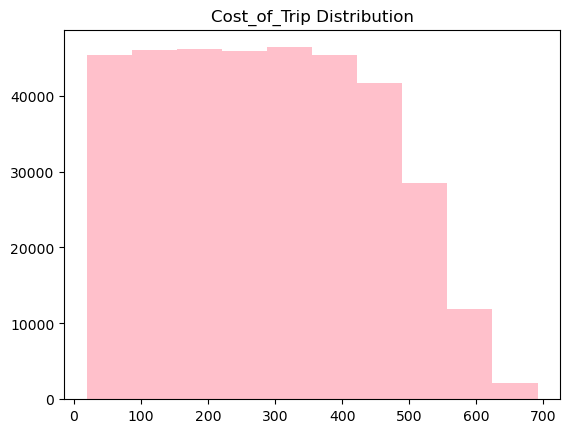

In [41]:
binsize = 200
bins = np.arange(0,cab.Cost_of_Trip.max()+binsize, binsize)
plt.hist(cab.Cost_of_Trip)
plt.title('Cost_of_Trip Distribution')
plt.show() 

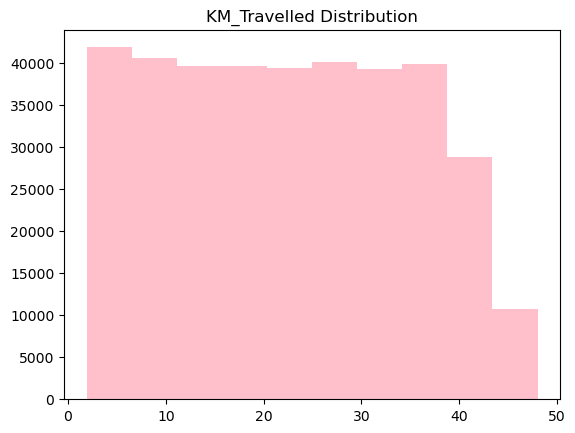

In [42]:
binsize = 20
bins = np.arange(0,cab.KM_Travelled.max()+binsize, binsize)
plt.hist(cab.KM_Travelled)
plt.title('KM_Travelled Distribution')
plt.show() 

<Axes: xlabel='KM_Travelled'>

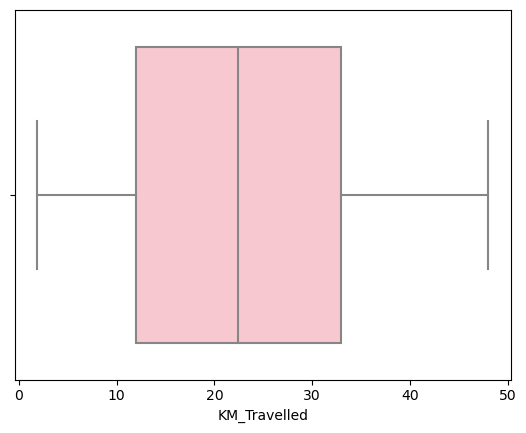

In [43]:
sns.boxplot(x=cab.KM_Travelled)

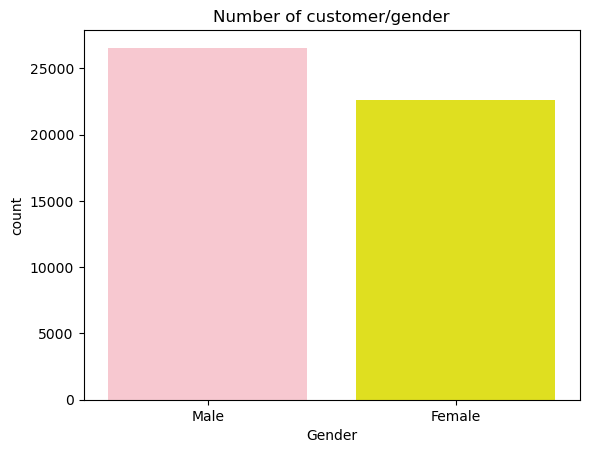

In [72]:
sns.countplot(x=customer.Gender)
plt.title('Number of customer/gender')
plt.show() 

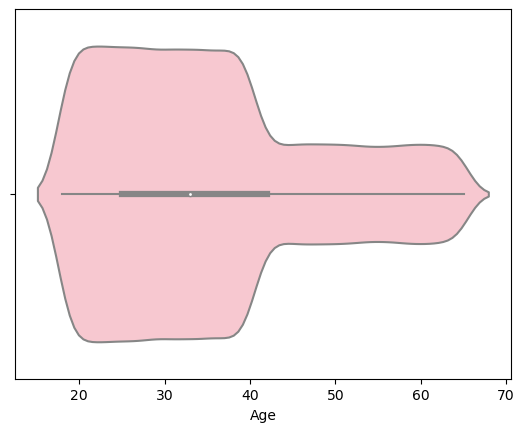

In [73]:
sns.violinplot(x=customer["Age"])
plt.show()

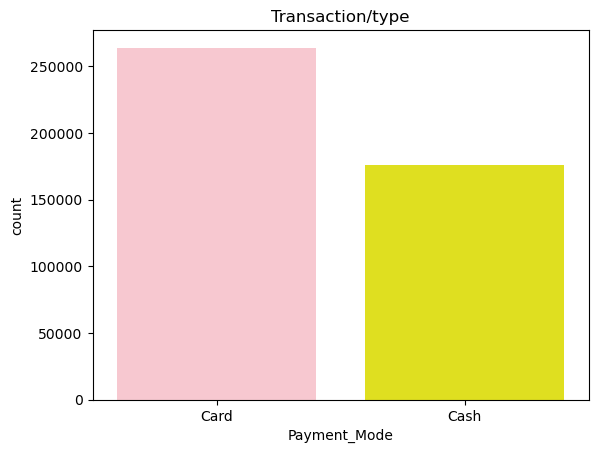

In [74]:
sns.countplot(x=Transaction.Payment_Mode)
plt.title('Transaction/type')
plt.show() 

In [48]:
customer.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')

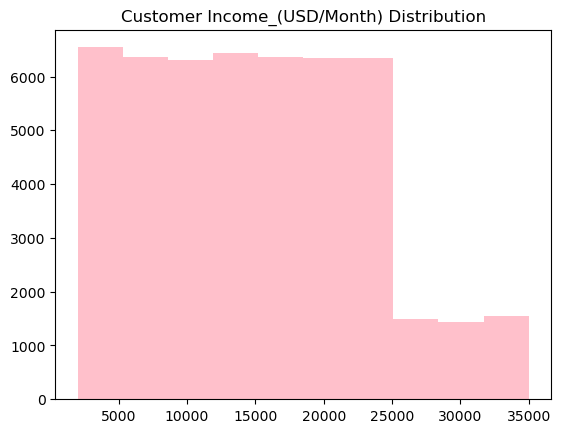

In [75]:
binsize = 20
bins = np.arange(0,customer['Income_(USD/Month)'].max()+binsize, binsize)
plt.hist(customer['Income_(USD/Month)'])
plt.title('Customer Income_(USD/Month) Distribution')
plt.show() 

<Axes: ylabel='Income_(USD/Month)'>

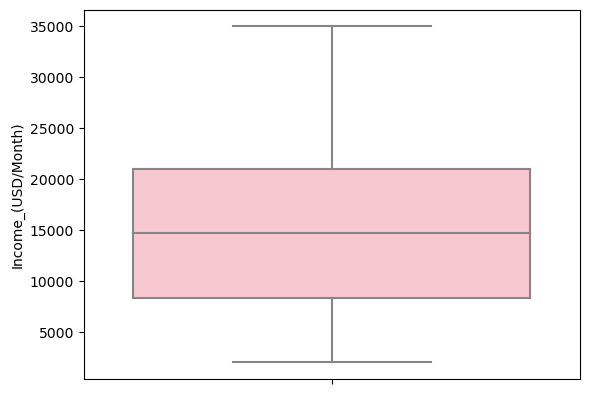

In [50]:
sns.boxplot(y=customer['Income_(USD/Month)'])

### Bivariate analysis,

In order to choose which cabin would be a good investment, it would be important to conduct investigations on the finances, logistics and customer management, often the companies with the largest capital are not necessarily the one that could bring the most profit but still remains a decision factor. 
My investigation will therefore focus on customers, booths, profits collected

#### NUMBER OF ACTIVE CUSTOMER ACCROSS YEAR BY COMPANY

In [76]:
dt['year']=dt['Date_of_Travel'].apply(lambda x:x.strftime("%Y"))

In [77]:
nb_customer=dt[['Company','Customer_ID','year']].groupby(['Company','year']).count().reset_index().rename(columns={'Customer_ID':'Number_Of_Customer'})

In [78]:
nb_customer

,Company,year,Number_Of_Customer
0,Pink Cab,2016,25080
1,Pink Cab,2017,30321
2,Pink Cab,2018,29310
3,Yellow Cab,2016,82239
4,Yellow Cab,2017,98189
5,Yellow Cab,2018,94253


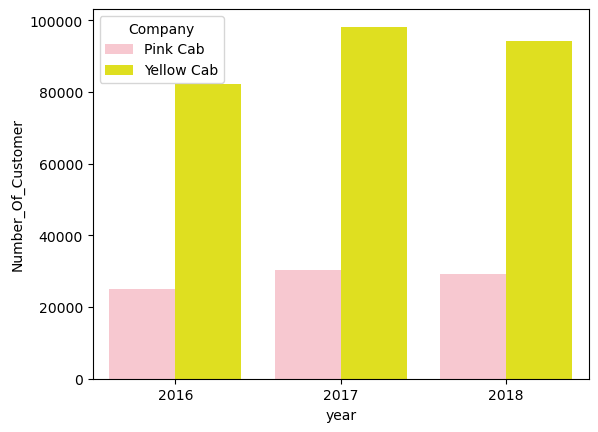

In [79]:
sns.barplot(x='year', y='Number_Of_Customer', hue = 'Company', data=nb_customer);

Througout the two year keep the top and obviously has the most customer from 2016 to 2018
Yellow cab here is the company that has the more customer almost three times the number of pink cab

In [80]:
nb_customer

,Company,year,Number_Of_Customer
0,Pink Cab,2016,25080
1,Pink Cab,2017,30321
2,Pink Cab,2018,29310
3,Yellow Cab,2016,82239
4,Yellow Cab,2017,98189
5,Yellow Cab,2018,94253


In [56]:
#CUSTOMER AGE BY COMPANY

In [57]:
#pRICE-Cost of Trip TOTAL BY COMPANY

#### what is the overall benefit made by each COMPANY?

In [81]:
dt['benefice']=dt.Price_Charged-dt.Cost_of_Trip

In [84]:
data=dt.groupby('Company')['benefice'].sum()
data

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: benefice, dtype: float64

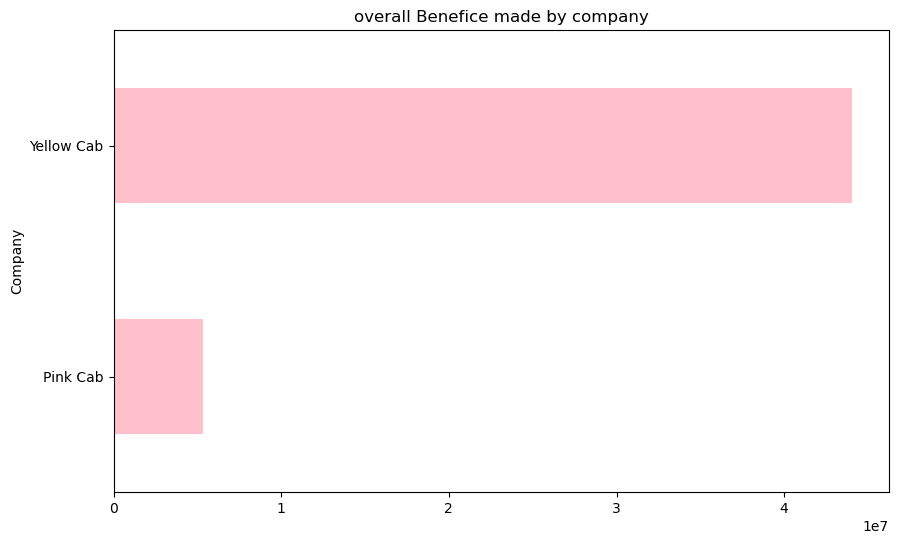

In [85]:
data.plot(kind='barh',figsize = (10,6))
plt.title('overall Benefice made by company')
plt.show() 

Here again PINK CAB barely stand ,the Cumulative benefice of Pink cab is nothing compare to yellow cab

In [60]:
dt.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Customer_ID', 'Payment_Mode',
       'Gender', 'Age', 'Income_(USD/Month)', 'year', 'benefice'],
      dtype='object')

In [61]:
dt.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [62]:
#pRICE-Cost of Trip TOTAL BY YEAR BY COMPANY

## What is the company that made more cumulatives benefit?

In [63]:
dt2=dt[['Company','year','benefice']].groupby(['Company','year'])['benefice'].mean().reset_index().rename(columns={'benefice': 'average_benefice'})

In [64]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           6 non-null      object 
 1   year              6 non-null      object 
 2   average_benefice  6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


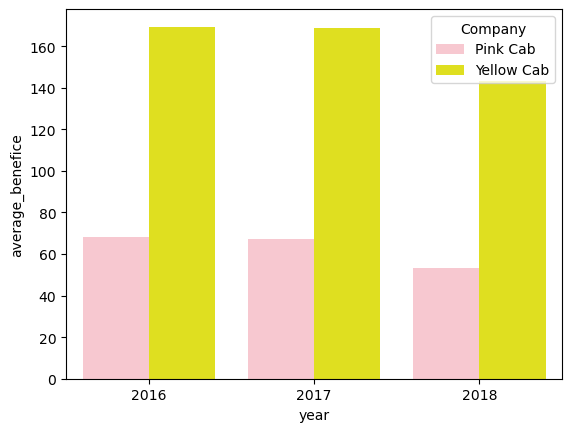

In [65]:
sns.barplot(x='year', y='average_benefice', hue = 'Company', data=dt2);

The average benefice comfirm what i said before

#### In which cities the companies relized the highest  Number of transaction?

In [67]:
dt3=dt[['Transaction_ID','Company','City']].groupby(['Company','City']).Transaction_ID.count().reset_index().rename(columns={'Transaction_ID': 'Number_of_Transaction'})

In [68]:

dt3 = dt3.groupby('Company')\
        .apply(lambda x: x.sort_values(['Number_of_Transaction'], ascending=False)\
        .head(5))\
        .reset_index(drop=True)


In [69]:
dt3

,Company,City,Number_of_Transaction
0,Pink Cab,LOS ANGELES CA,19865
1,Pink Cab,NEW YORK NY,13967
2,Pink Cab,SAN DIEGO CA,10672
3,Pink Cab,CHICAGO IL,9361
4,Pink Cab,BOSTON MA,5186
5,Yellow Cab,NEW YORK NY,85918
6,Yellow Cab,CHICAGO IL,47264
7,Yellow Cab,WASHINGTON DC,40045
8,Yellow Cab,LOS ANGELES CA,28168
9,Yellow Cab,BOSTON MA,24506


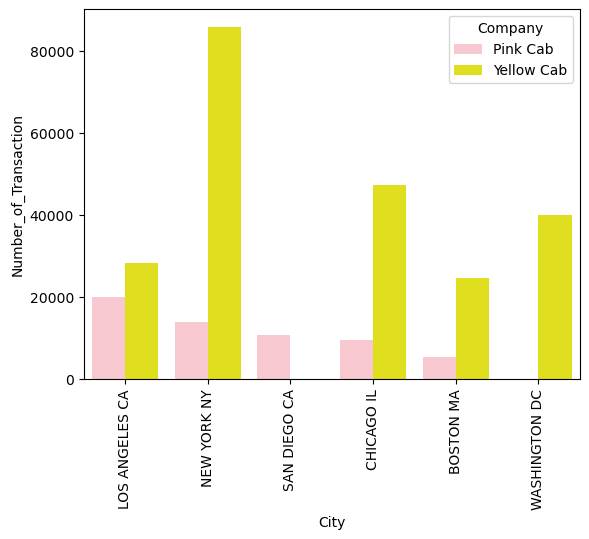

In [70]:
sns.barplot(x='City', y='Number_of_Transaction', hue = 'Company', data=dt3);
# rotate the x label
plt.xticks(rotation=90)
# display the plot
plt.show()

LA, NY, San Diego, Chicago, Boston and Washington DC are the cities where we have the most activity. With this result, I can conclude that the investment should be placed in the yellow cab, since the company has the highest revenue, the largest number of customers and in all cities records more transactions than the pink cab company. 

In [71]:
dt[['Transaction_ID','Company','City']].groupby(['Company','City']).Transaction_ID.count()

Company     City          
Pink Cab    ATLANTA GA         1762
            AUSTIN TX          1868
            BOSTON MA          5186
            CHICAGO IL         9361
            DALLAS TX          1380
            DENVER CO          1394
            LOS ANGELES CA    19865
            MIAMI FL           2002
            NASHVILLE TN       1841
            NEW YORK NY       13967
            ORANGE COUNTY      1513
            PHOENIX AZ          864
            PITTSBURGH PA       682
            SACRAMENTO CA      1334
            SAN DIEGO CA      10672
            SEATTLE WA         2732
            SILICON VALLEY     3797
            TUCSON AZ           799
            WASHINGTON DC      3692
Yellow Cab  ATLANTA GA         5795
            AUSTIN TX          3028
            BOSTON MA         24506
            CHICAGO IL        47264
            DALLAS TX          5637
            DENVER CO          2431
            LOS ANGELES CA    28168
            MIAMI FL           4452
 

![Image of Yaktocat](https://as1.ftcdn.net/v2/jpg/01/28/65/92/1000_F_128659204_PI24FOnFEBeIZez4f4dsn9TaM63JLMAa.jpg)

<h1><center>We should invest on Yellow Cab Company</center></h1>